In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filepath='D:\Projects\DATA_ANALYST_PROJECTS\Customer_Segmentation_&_Market_Basket_Analysis\data\Market_Basket_Cleaned.csv'
df=pd.read_csv(filepath)

In [4]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d %H:%M:%S')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382813 entries, 0 to 382812
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      382813 non-null  int64         
 1   Itemname    382813 non-null  object        
 2   Quantity    382813 non-null  int64         
 3   Date        382813 non-null  datetime64[ns]
 4   Price       382813 non-null  float64       
 5   CustomerID  382813 non-null  int64         
 6   Country     382813 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 20.4+ MB


In [6]:
# Summary Statistics
df.describe()

,BillNo,Quantity,Price,CustomerID
count,382813.000000,382813.000000,382813.000000,382813.000000
mean,560585.176462,13.025997,3.088630,15310.363070
std,13108.361573,183.823107,22.131991,1722.492139
min,536365.000000,1.000000,0.000000,12346.000000
25%,549234.000000,2.000000,1.250000,13929.000000
50%,561873.000000,6.000000,1.950000,15249.000000
75%,572088.000000,12.000000,3.750000,16820.000000
max,581587.000000,80995.000000,8142.750000,18287.000000


In [7]:
df['YearMonth']=df['Date'].dt.to_period('M')

In [8]:
monthly_transaction=df.groupby('YearMonth')['BillNo'].nunique()

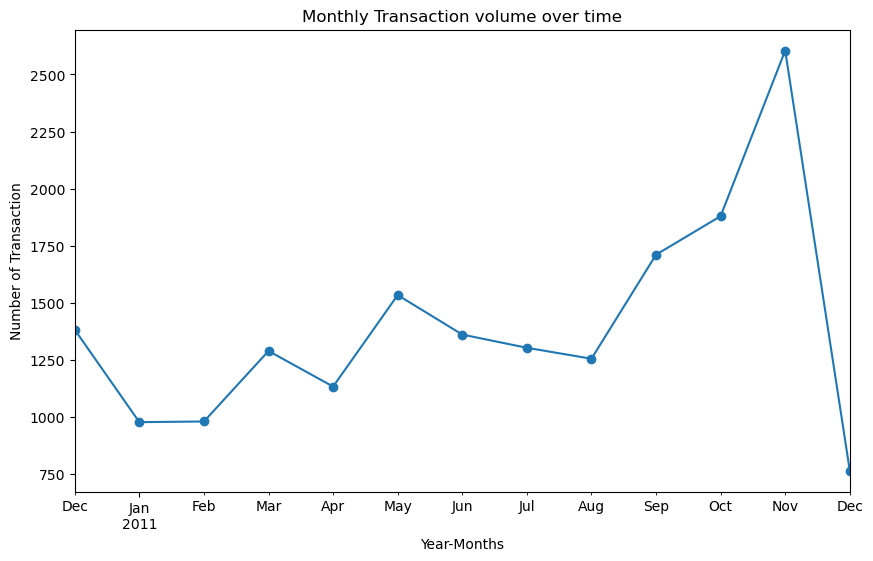

In [9]:
# Transaction trend over month
plt.figure(figsize=(10,6))
monthly_transaction.plot(kind='line',marker='o')
plt.title('Monthly Transaction volume over time')
plt.xlabel('Year-Months')
plt.ylabel('Number of Transaction')
plt.show()

In [10]:
top_product=df['Itemname'].value_counts().sort_values(ascending=False).head(10)
top_product


WHITE HANGING HEART T-LIGHT HOLDER    1964
REGENCY CAKESTAND 3 TIER              1634
JUMBO BAG RED RETROSPOT               1588
ASSORTED COLOUR BIRD ORNAMENT         1378
PARTY BUNTING                         1362
LUNCH BAG RED RETROSPOT               1281
SET OF 3 CAKE TINS PANTRY DESIGN      1118
LUNCH BAG  BLACK SKULL.               1065
POSTAGE                               1043
PACK OF 72 RETROSPOT CAKE CASES       1013
Name: Itemname, dtype: int64

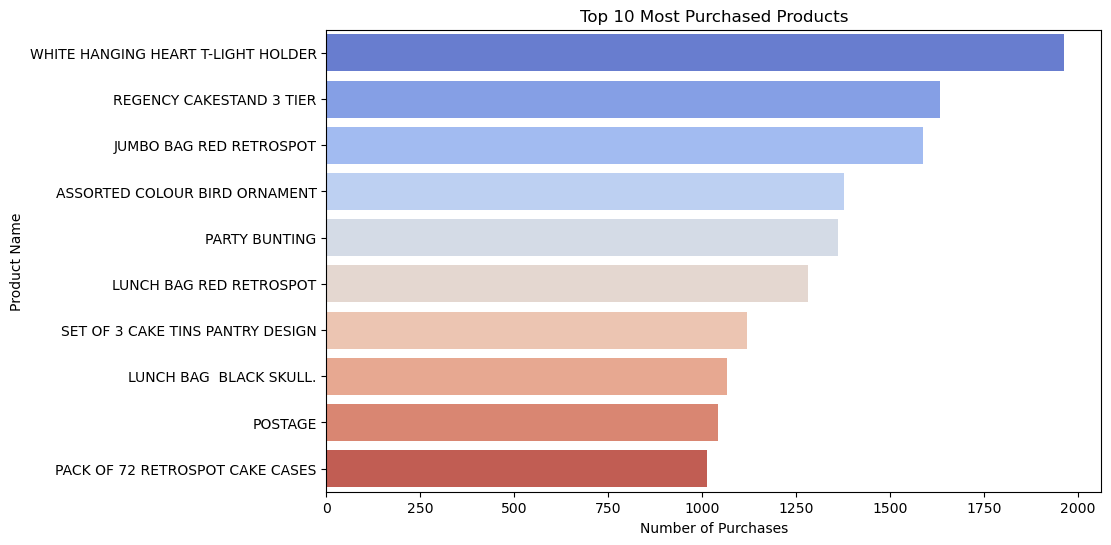

In [11]:
# Top 10 Selling Products
plt.figure(figsize=(10,6))
sns.barplot(x=top_product.values,y=top_product.index,palette='coolwarm')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Name')
plt.show()

In [12]:
df['Total_Amount']=df['Quantity']*df['Price']

In [21]:
average_spending=df.groupby('CustomerID')['Total_Amount'].sum().mean()
print(f'Average Spending per Customer : {average_spending:.2f}')

Average Spending per Customer : 1987.54


In [14]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,YearMonth,Total_Amount
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34


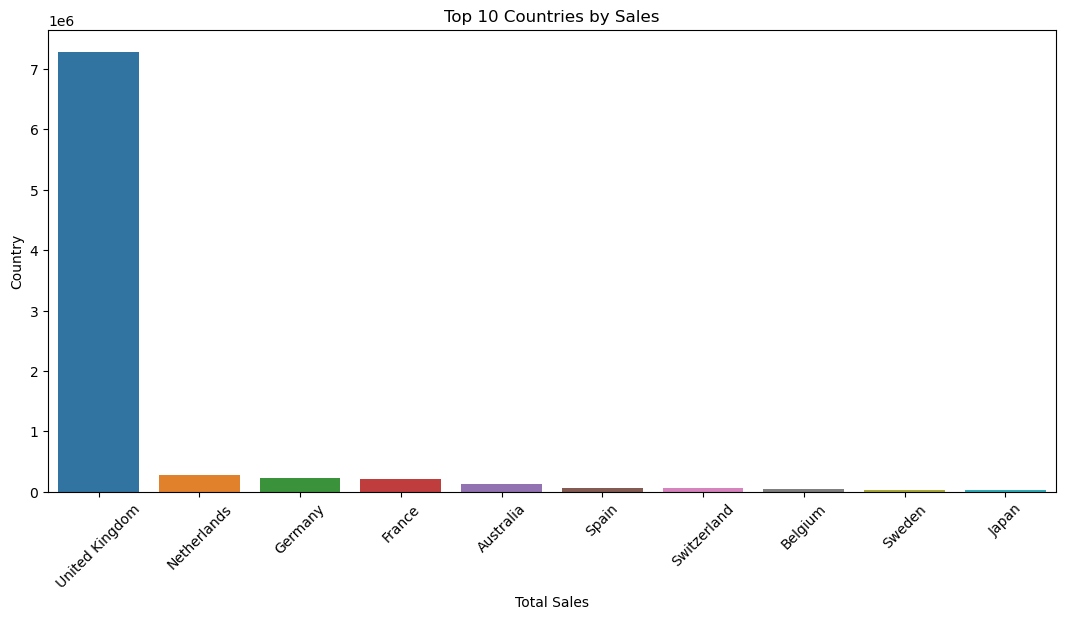

In [34]:
# Country wise sales 
countrywise_sales=df.groupby('Country')['Total_Amount'].sum().round(2).sort_values(ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=countrywise_sales.index[:10],y=countrywise_sales.values[:10])
plt.title('Top 10 Countries by Sales')
plt.xticks(rotation=45)
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

In [26]:
countrywise_sales.head(10)

Country
United Kingdom    7284793.19
Netherlands        285446.34
Germany            228678.40
France             208934.31
Australia          138453.81
Spain               61558.56
Switzerland         56443.95
Belgium             41196.34
Sweden              38367.83
Japan               37416.37
Name: Total_Amount, dtype: float64